In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle

In [14]:
plt.rcdefaults()

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
iris_dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
iris_dataset["data"][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [19]:
iris_dataset["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
iris_dataset["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
x_iris = pd.DataFrame(data=iris_dataset["data"], columns=iris_dataset["feature_names"])
x_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y_iris = pd.DataFrame(data=iris_dataset["target"], columns=["species"])
y_iris.head()

,species
0,0
1,0
2,0
3,0
4,0


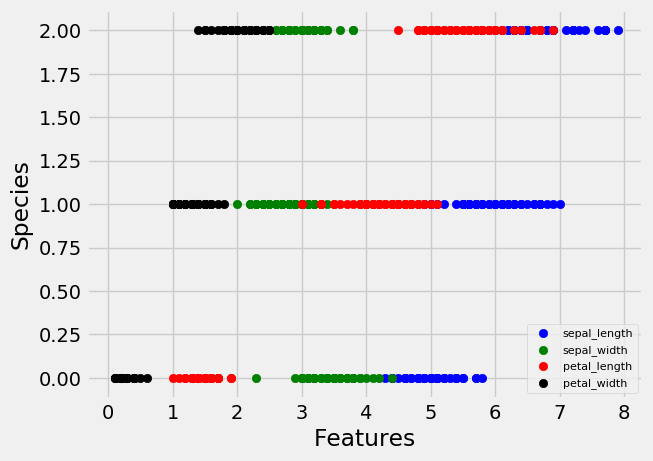

In [23]:
plt.style.use("fivethirtyeight")

plt.xlabel('Features')
plt.ylabel('Species')

plt_x = x_iris.loc[:, 'sepal length (cm)']
plt_y = y_iris
plt.scatter(plt_x, plt_y, color='blue', label='sepal_length')

plt_x = x_iris.loc[:, 'sepal width (cm)']
plt_y = y_iris
plt.scatter(plt_x, plt_y, color='green', label='sepal_width')

plt_x = x_iris.loc[:, 'petal length (cm)']
plt_y = y_iris
plt.scatter(plt_x, plt_y, color='red', label='petal_length')

plt_x = x_iris.loc[:, 'petal width (cm)']
plt_y = y_iris
plt.scatter(plt_x, plt_y, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

### Training Data

In [24]:
for i in range(10):
    x_iris["species"] = y_iris["species"]
    x_iris = shuffle(x_iris)
    y_test: object
    x_train, x_test, y_train, y_test = train_test_split(x_iris.iloc[:, :-1], x_iris.loc[:, "species"], 
                                                        test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    print(accuracy_score(y_test, predict))

print("\n", classification_report(y_test, predict))

1.0
0.9666666666666667
0.8333333333333334
0.9666666666666667
0.9666666666666667
0.8666666666666667
1.0
0.9666666666666667
1.0
0.9666666666666667

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

